Libraries imported successfully!
Sample dataset created successfully!
Dataset shape: (1005, 7)

STEP 2: Preview the first 10 records
   UserID  Gender  Age  EstimatedSalary  Purchased      City  Experience
0       1    Male   37     28905.238045          0    London    3.941994
1       2   Other   19     48753.416411          1  New York    0.715983
2       3  Female   40     27429.194390          0  New York    5.882492
3       4  Female   42     61400.839455          0    London    7.924008
4       5    Male   42     51236.596294          0     Paris    0.891774
5       6    Male   48     28136.727508          0     Paris    0.550822
6       7    Male   45     45361.863844          0    London    0.786284
7       8  Female   41     38717.653916          0     Paris   10.483043
8       9  Female   34     54787.617656          0  New York    3.755887
9      10  Female   15     70106.756690          0  New York    3.148618

STEP 3: Preview the last 3 records
      UserID  Gender  Age  E

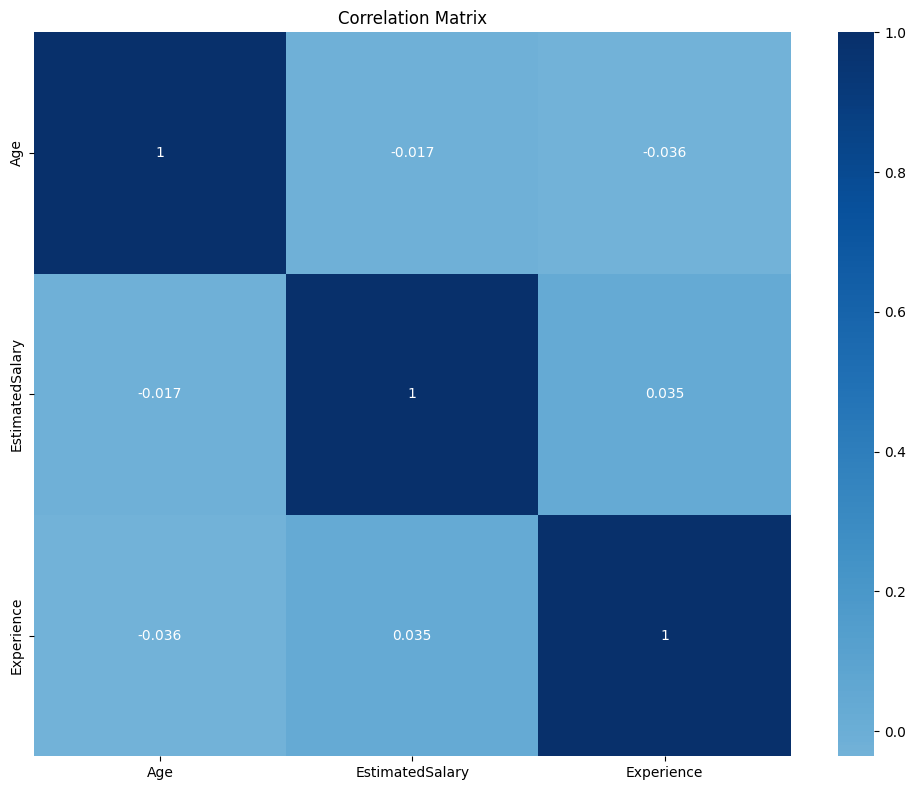

Correlation matrix:
                      Age  EstimatedSalary  Experience
Age              1.000000        -0.017043   -0.035771
EstimatedSalary -0.017043         1.000000    0.034613
Experience      -0.035771         0.034613    1.000000

STEP 33: Data type detection in EstimatedSalary column
Data types found in EstimatedSalary column:
EstimatedSalary
<class 'float'>    1005
Name: count, dtype: int64

STEP 34: Age Distribution Plot


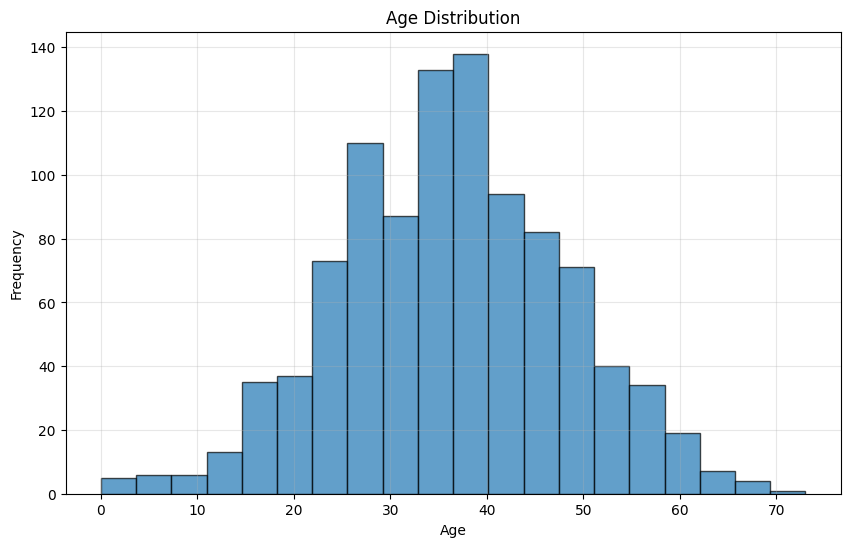

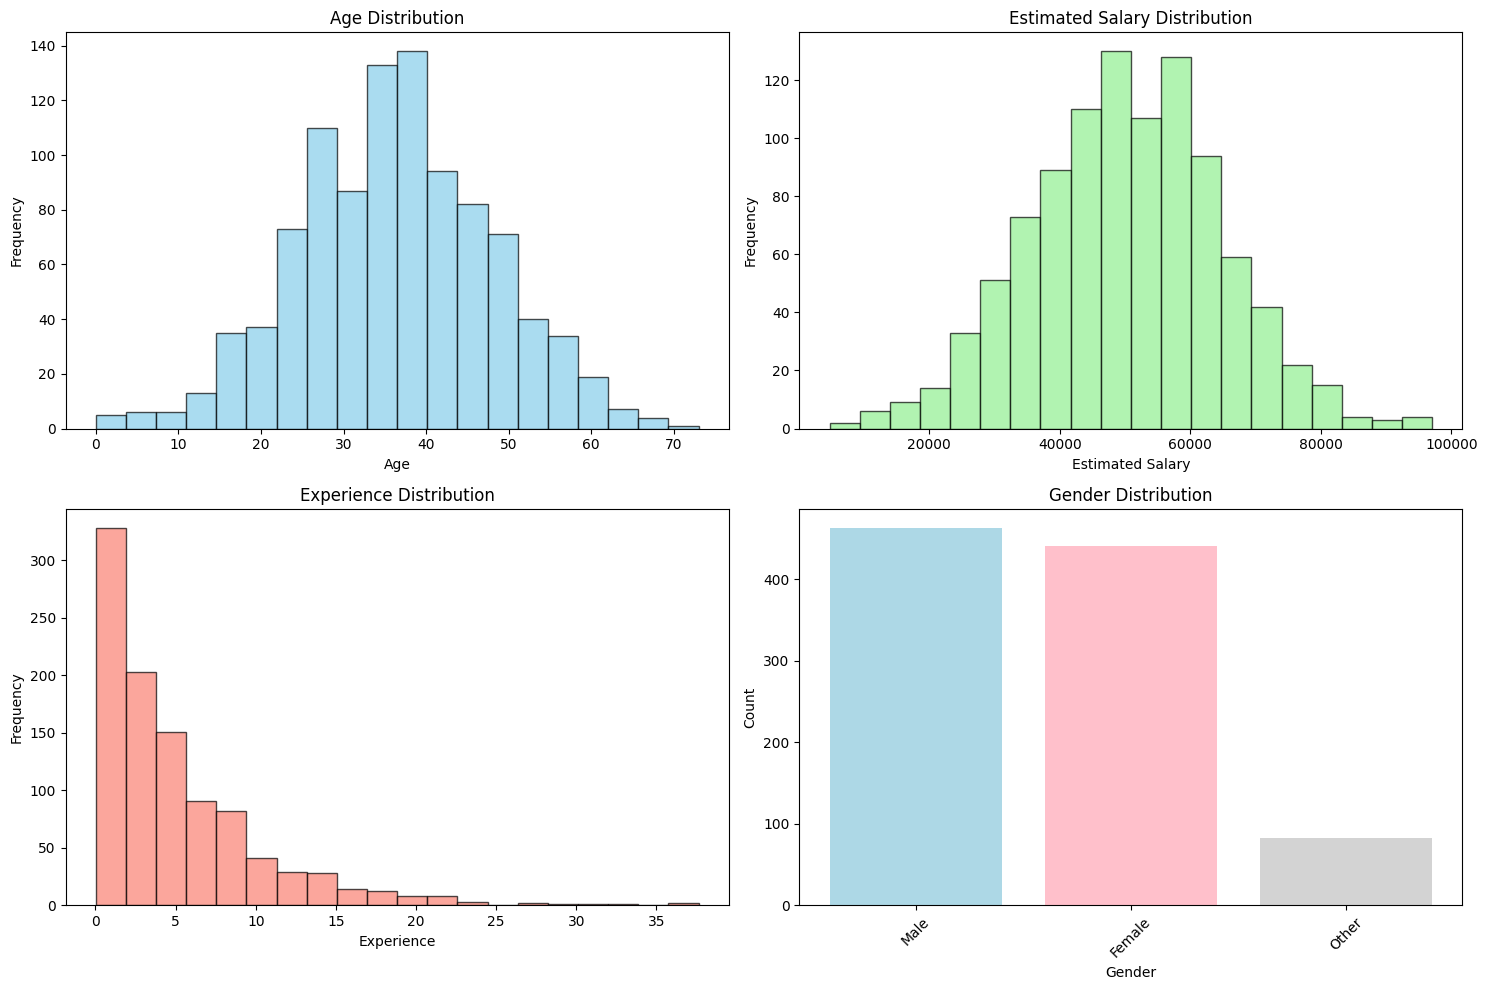


ADVANCED ANALYSIS


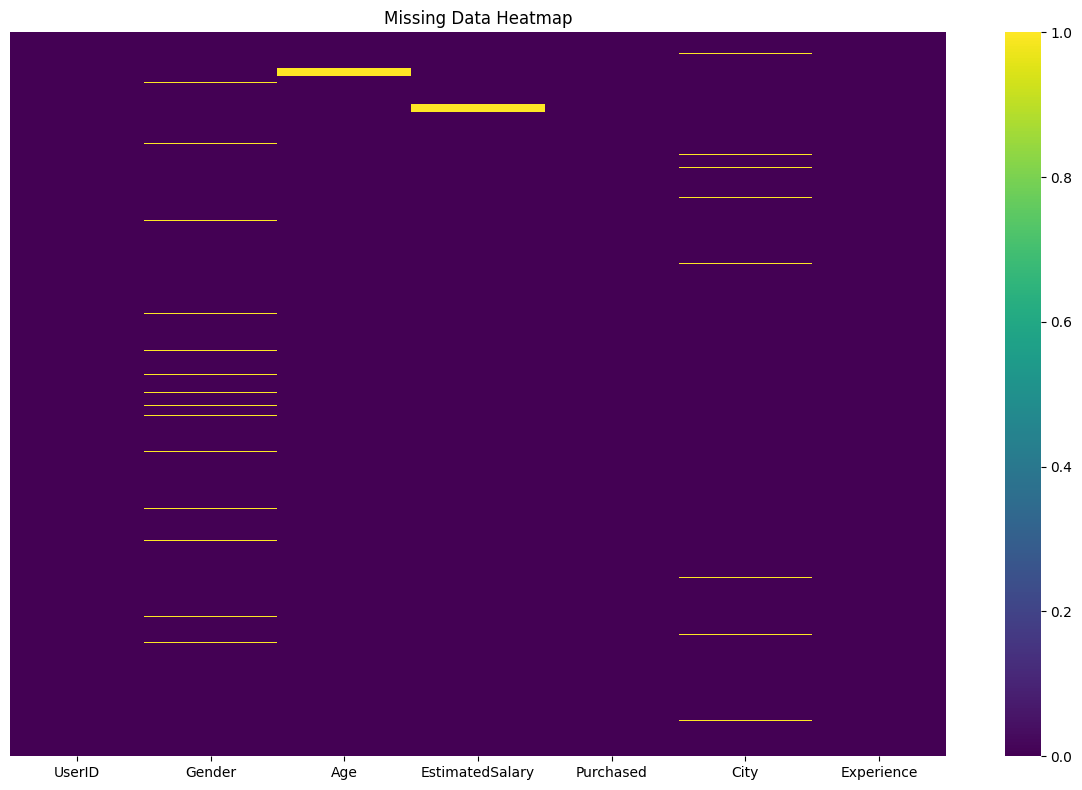

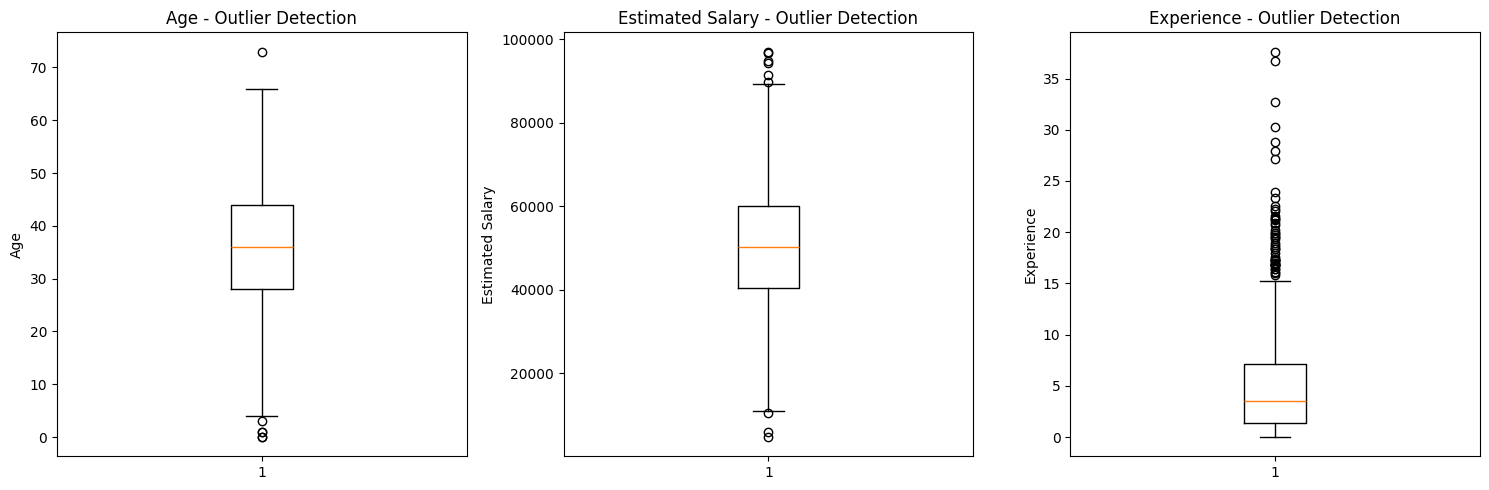


STEP 35: AUTOMATED EDA WITH ydata-profiling
To use ydata-profiling, first install it:
!pip install ydata-profiling

Then run the following code:

from ydata_profiling import ProfileReport

# Generate comprehensive report
profile = ProfileReport(df, 
                       title='Data Inspection Report',
                       explorative=True)

# Display in notebook
profile.to_notebook_iframe()

# Or save to HTML file
# profile.to_file("data_inspection_report.html")


FINAL SUMMARY
Dataset Overview:
- Total rows: 1005
- Total columns: 7
- Memory usage: 205.79 KB
- Duplicate rows: 5
- Columns with missing values: 4
  Missing value details:
    Gender: 18 (1.8%)
    Age: 10 (1.0%)
    EstimatedSalary: 10 (1.0%)
    City: 17 (1.7%)
- Numeric columns: 3
- Categorical columns: 3

Data inspection completed successfully!


In [ ]:
# LAB 2.3: Data Inspection
# Aim: Develop skills to inspect, understand, and evaluate datasets after loading them.

# Objectives:
# ➔ Preview datasets using .head(), .tail(), and .sample().
# ➔ Examine the structure and metadata of a DataFrame using .shape, .info(), .dtypes, and .columns.
# ➔ Perform statistical summarization using .describe(), .value_counts(), and .unique().
# ➔ Detect and quantify missing or null values using .isnull() and .notnull().
# ➔ Identify duplicate rows and check for outliers or anomalies.
# ➔ Visualize patterns in missing data using heatmaps (optional with seaborn/matplotlib).

# STEP 1: Import Pandas and other necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

# Load sample dataset
# Creating a sample dataset similar to what's referenced in the lab
# You can replace this with your actual dataset from the datasets folder
np.random.seed(42)

# Create sample data
n_samples = 1000
sample_data = {
    'UserID': range(1, n_samples + 1),
    'Gender': np.random.choice(['Male', 'Female', 'Other', None], n_samples, p=[0.45, 0.45, 0.08, 0.02]),
    'Age': np.random.normal(35, 12, n_samples),  # Keep as float to allow NaN
    'EstimatedSalary': np.random.normal(50000, 15000, n_samples),
    'Purchased': np.random.choice([0, 1], n_samples, p=[0.7, 0.3]),
    'City': np.random.choice(['New York', 'London', 'Paris', 'Tokyo', None], n_samples, p=[0.25, 0.25, 0.25, 0.23, 0.02]),
    'Experience': np.random.exponential(5, n_samples)
}

# Create DataFrame first
df = pd.DataFrame(sample_data)

# Now add missing values (this works after DataFrame creation)
df.loc[50:59, 'Age'] = np.nan
df.loc[100:109, 'EstimatedSalary'] = np.nan

# Convert Age to integer where possible (pandas nullable integer)
df['Age'] = df['Age'].round().astype('Int64')  # Use nullable integer type

# Add some duplicate rows
df = pd.concat([df, df.iloc[:5]], ignore_index=True)

print("Sample dataset created successfully!")
print(f"Dataset shape: {df.shape}")

# STEP 2: Preview the first 10 records of the dataset
print("\n" + "="*50)
print("STEP 2: Preview the first 10 records")
print("="*50)
print(df.head(10))

# STEP 3: Preview the last 3 records of the dataset
print("\n" + "="*50)
print("STEP 3: Preview the last 3 records")
print("="*50)
print(df.tail(3))

# STEP 4: Randomly preview 5 records of the dataset (try different random_states: 42, 0, 1, 2)
print("\n" + "="*50)
print("STEP 4: Randomly preview 5 records (random_state=72)")
print("="*50)
print(df.sample(5, random_state=72))

print("\n" + "="*50)
print("STRUCTURAL & METADATA EXAMINATION")
print("="*50)

# STEP 5: View the shape of the entire dataset
print("\nSTEP 5: Dataset shape")
print(f"Shape: {df.shape}")  # Tuple: (rows, columns)

# STEP 6: List the column names
print("\nSTEP 6: Column names")
print("Columns:", df.columns.tolist())

# STEP 7: Get the row index range
print("\nSTEP 7: Row index range")
print("Index:", df.index)

# STEP 8: Data types per column
print("\nSTEP 8: Data types per column")
print(df.dtypes)

# STEP 9: Full metadata: non-nulls, types, memory
print("\nSTEP 9: Full metadata information")
df.info()

print("\n" + "="*50)
print("STATISTICAL SUMMARIZATION")
print("="*50)

# STEP 10: Get numeric summary statistics
print("\nSTEP 10: Numeric summary statistics")
print(df.describe())

# STEP 11: Summary of categorical columns
print("\nSTEP 11: Summary of categorical columns")
print(df.describe(include='object'))

# STEP 13: Get the frequency of each feature (column), e.g., the gender column
print("\nSTEP 13: Frequency of Gender values")
print(df['Gender'].value_counts())

# STEP 14: Get unique features of a given feature (column), e.g., the gender column
print("\nSTEP 14: Unique Gender categories")
print("Unique genders:", df['Gender'].unique())

print("\n" + "="*50)
print("MISSING OR NULL VALUES DETECTION")
print("="*50)

# STEP 15: Count number of nulls values per column
print("\nSTEP 15: Count of null values per column")
print(df.isnull().sum())

# STEP 16: Percentage of null values per column
print("\nSTEP 16: Percentage of null values per column")
print(df.isnull().mean() * 100)

# STEP 17: Count of non-null values
print("\nSTEP 17: Count of non-null values")
print(df.notnull().sum())

# STEP 18: Get the rows where a particular feature (column), e.g., 'Age,' is missing
print("\nSTEP 18: Rows where 'Age' is missing")
print(df[df['Age'].isnull()])

print("\n" + "="*50)
print("DUPLICATE ROW DETECTION")
print("="*50)

# STEP 19: Get total duplicate rows
print("\nSTEP 19: Total duplicate rows")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# STEP 20: View duplicate rows
print("\nSTEP 20: View duplicate rows")
duplicates = df[df.duplicated()]
if not duplicates.empty:
    print(duplicates)
else:
    print("No duplicate rows found")

# STEP 21: Basic Outlier and Anomaly Detection
print("\n" + "="*50)
print("STEP 21: Outlier Detection for Age")
print("="*50)

# Remove NaN values for outlier detection
age_clean = df['Age'].dropna()
Q1 = age_clean.quantile(0.25)
Q3 = age_clean.quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Age'] < Q1 - 1.5 * IQR) | (df['Age'] > Q3 + 1.5 * IQR)]

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower bound: {Q1 - 1.5 * IQR}")
print(f"Upper bound: {Q3 + 1.5 * IQR}")
print(f"Number of outliers: {len(outliers)}")

if not outliers.empty:
    print("\nOutlier rows:")
    print(outliers[['UserID', 'Age']])

# STEP 22: Get column-wise summary (beyond .describe())
print("\n" + "="*50)
print("STEP 22: Extended statistical summary for EstimatedSalary")
print("="*50)

salary_clean = df['EstimatedSalary'].dropna()
print(f"Minimum Salary: {salary_clean.min():.2f}")
print(f"Maximum Salary: {salary_clean.max():.2f}")
print(f"Median Salary: {salary_clean.median():.2f}")
print(f"Standard Deviation: {salary_clean.std():.2f}")
print(f"Skewness: {salary_clean.skew():.2f}")
print(f"Kurtosis: {salary_clean.kurt():.2f}")

print("\n" + "="*50)
print("CATEGORICAL COLUMN INSPECTION")
print("="*50)

# STEP 23: Number of unique values
print("\nSTEP 23: Number of unique values in Gender")
print(f"Number of unique Gender values: {df['Gender'].nunique()}")

# STEP 24: List the frequencies of each Gender feature, including entries where gender information is not available
print("\nSTEP 24: Gender frequencies including NaN values")
print(df['Gender'].value_counts(dropna=False))

# STEP 25: Get the percentage count
print("\nSTEP 25: Gender percentage distribution")
print(df['Gender'].value_counts(normalize=True) * 100)

# STEP 26: Check Column Cardinality (for encoding decisions)
print("\nSTEP 26: Column cardinality (unique values per column)")
print(df.nunique().sort_values())

# STEP 27: Data Type Conversion (for better inspection)
print("\n" + "="*50)
print("STEP 27: Data type conversion")
print("="*50)

print("Before conversion:")
print(df.dtypes)

df['Purchased'] = df['Purchased'].astype('bool')
df['UserID'] = df['UserID'].astype('str')  # Treat as categorical ID

print("\nAfter conversion:")
df.info()

# STEP 28: Preview the first 5 records again
print("\n" + "="*50)
print("STEP 28: Preview first 5 records after type conversion")
print("="*50)
print(df.head())

# STEP 29: Find Columns with High Missing Values
print("\n" + "="*50)
print("STEP 29: Columns with missing values")
print("="*50)

missing_summary = df.isnull().sum()
missing_cols = missing_summary[missing_summary > 0]
if not missing_cols.empty:
    print("Columns with missing values (sorted by count):")
    print(missing_cols.sort_values(ascending=False))
else:
    print("No missing values found in any column")

# STEP 30: Transpose a DataFrame for Better Viewing
print("\n" + "="*50)
print("STEP 30: Transposed view")
print("="*50)

print("Transposed head():")
print(df.head().T)

print("\nTransposed describe():")
print(df.describe().T)

# STEP 31: Check Column Names for Issues
print("\n" + "="*50)
print("STEP 31: Column name inspection")
print("="*50)

print("Column names as list:")
print(df.columns.tolist())

print("\nColumn names after stripping whitespace:")
print(df.columns.str.strip().tolist())

print("\nCheck for duplicate column names:")
print("Duplicate columns:", df.columns.duplicated().any())

# STEP 32: Correlation Matrix for Numeric Columns
print("\n" + "="*50)
print("STEP 32: Correlation Matrix")
print("="*50)

plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

print("Correlation matrix:")
print(correlation_matrix)

# STEP 33: Detect Mixed Data Types in a Column
print("\n" + "="*50)
print("STEP 33: Data type detection in EstimatedSalary column")
print("="*50)

print("Data types found in EstimatedSalary column:")
print(df['EstimatedSalary'].apply(type).value_counts())

# STEP 34: Value Distribution Plot (Numerical Columns)
print("\n" + "="*50)
print("STEP 34: Age Distribution Plot")
print("="*50)

plt.figure(figsize=(10, 6))
df['Age'].hist(bins=20, edgecolor='black', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Additional distribution plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Age distribution
axes[0, 0].hist(df['Age'].dropna(), bins=20, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# EstimatedSalary distribution
axes[0, 1].hist(df['EstimatedSalary'].dropna(), bins=20, edgecolor='black', alpha=0.7, color='lightgreen')
axes[0, 1].set_title('Estimated Salary Distribution')
axes[0, 1].set_xlabel('Estimated Salary')
axes[0, 1].set_ylabel('Frequency')

# Experience distribution
axes[1, 0].hist(df['Experience'].dropna(), bins=20, edgecolor='black', alpha=0.7, color='salmon')
axes[1, 0].set_title('Experience Distribution')
axes[1, 0].set_xlabel('Experience')
axes[1, 0].set_ylabel('Frequency')

# Gender distribution (bar plot)
gender_counts = df['Gender'].value_counts()
axes[1, 1].bar(gender_counts.index, gender_counts.values, color=['lightblue', 'pink', 'lightgray'])
axes[1, 1].set_title('Gender Distribution')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("ADVANCED ANALYSIS")
print("="*50)

# Missing data heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis', cbar=True)
plt.title('Missing Data Heatmap')
plt.tight_layout()
plt.show()

# Box plots for outlier detection
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Age boxplot
axes[0].boxplot(df['Age'].dropna())
axes[0].set_title('Age - Outlier Detection')
axes[0].set_ylabel('Age')

# EstimatedSalary boxplot
axes[1].boxplot(df['EstimatedSalary'].dropna())
axes[1].set_title('Estimated Salary - Outlier Detection')
axes[1].set_ylabel('Estimated Salary')

# Experience boxplot
axes[2].boxplot(df['Experience'].dropna())
axes[2].set_title('Experience - Outlier Detection')
axes[2].set_ylabel('Experience')

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("STEP 35: AUTOMATED EDA WITH ydata-profiling")
print("="*50)

print("To use ydata-profiling, first install it:")
print("!pip install ydata-profiling")
print("\nThen run the following code:")

print("""
from ydata_profiling import ProfileReport

# Generate comprehensive report
profile = ProfileReport(df, 
                       title='Data Inspection Report',
                       explorative=True)

# Display in notebook
profile.to_notebook_iframe()

# Or save to HTML file
# profile.to_file("data_inspection_report.html")
""")

# Summary statistics
print("\n" + "="*50)
print("FINAL SUMMARY")
print("="*50)

print(f"Dataset Overview:")
print(f"- Total rows: {df.shape[0]}")
print(f"- Total columns: {df.shape[1]}")
print(f"- Memory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")
print(f"- Duplicate rows: {df.duplicated().sum()}")

missing_summary = df.isnull().sum()
columns_with_missing = missing_summary[missing_summary > 0]
print(f"- Columns with missing values: {len(columns_with_missing)}")

if len(columns_with_missing) > 0:
    print("  Missing value details:")
    for col, missing_count in columns_with_missing.items():
        missing_pct = (missing_count / len(df)) * 100
        print(f"    {col}: {missing_count} ({missing_pct:.1f}%)")

numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"- Numeric columns: {len(numeric_columns)}")
print(f"- Categorical columns: {len(categorical_columns)}")

print("\nData inspection completed successfully!")